# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [977]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# For Vizualization
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

import sklearn
from sklearn.model_selection import train_test_split



## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [978]:
# Importing the file porter_data_1.csv
df = pd.read_csv("porter_data_1.csv")

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [4]:
df.describe()

market_id  store_primary_category  order_protocol    total_items  \
count  175777.000000           175777.000000   175777.000000  175777.000000   
mean        2.743726               35.887949        2.911752       3.204976   
std         1.330963               20.728254        1.513128       2.674055   
min         1.000000                0.000000        1.000000       1.000000   
25%         2.000000               18.000000        1.000000       2.000000   
50%         2.000000               38.000000        3.000000       3.000000   
75%         4.000000               55.000000        4.000000       4.000000   
max         6.000000               72.000000        7.000000     411.000000   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  175777.000000       175777.000000   175777.000000   175777.000000   
mean     2697.111147            2.675060      684.965433     1160.158616   
std      1828.554893            1.625681      519.882924      560.828571   
min         0.000000            1.000000      -86.000000        0.000000   
25%      1412.000000            1.000000      299.000000      799.000000   
50%      2224.000000            2.000000      595.000000     1095.000000   
75%      3410.000000            3.000000      942.000000     1395.000000   
max     26800.000000           20.000000    14700.000000    14700.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          175777.000000       175777.000000             175777.000000   
mean               44.918664           41.861381                 58.230115   
std                34.544724           32.168505                 52.731043   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           63.000000                 85.000000   
max               171.000000          154.000000                285.000000   

            distance  
count  175777.000000  
mean       21.843090  
std         8.748712  
min         0.000000  
25%        15.360000  
50%        21.760000  
75%        28.120000  
max        83.520000

In [5]:
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [979]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])


In [39]:
df.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  
0                      21.0     34.44  
1                       2.0     27.60  
2                      18.0     11.56  
3                       8.0     31.80  
4                       7.0      8.20

In [40]:
df.isnull().mean()

market_id                   0.0
created_at                  0.0
actual_delivery_time        0.0
store_primary_category      0.0
order_protocol              0.0
total_items                 0.0
subtotal                    0.0
num_distinct_items          0.0
min_item_price              0.0
max_item_price              0.0
total_onshift_dashers       0.0
total_busy_dashers          0.0
total_outstanding_orders    0.0
distance                    0.0
dtype: float64

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [41]:
df["distance"].unique()

array([34.44, 27.6 , 11.56, ..., 51.  ,  0.28, 51.96])

In [980]:
# Convert categorical features to category type

num_cols=["created_at","actual_delivery_time","subtotal","min_item_price","max_item_price","total_onshift_dashers",
          "total_busy_dashers","total_outstanding_orders","distance","total_items","num_distinct_items"]
cat_cols=["market_id","order_protocol","store_primary_category"]

In [981]:
for col in cat_cols:
    df[col] = df[col].astype('category')

In [24]:
df.describe()

created_at           actual_delivery_time  \
count                         175777                         175777   
mean   2015-02-04 19:57:50.009631744  2015-02-04 20:44:02.190406144   
min              2015-01-21 15:22:03            2015-01-21 16:07:03   
25%              2015-01-29 01:31:19            2015-01-29 02:16:30   
50%              2015-02-05 02:41:26            2015-02-05 03:34:33   
75%              2015-02-12 01:04:32            2015-02-12 01:48:24   
max              2015-02-18 06:00:44            2015-02-18 06:51:10   
std                              NaN                            NaN   

            subtotal  total_onshift_dashers  total_busy_dashers  \
count  175777.000000          175777.000000       175777.000000   
mean     2697.111147              44.918664           41.861381   
min         0.000000              -4.000000           -5.000000   
25%      1412.000000              17.000000           15.000000   
50%      2224.000000              37.000000           35.000000   
75%      3410.000000              66.000000           63.000000   
max     26800.000000             171.000000          154.000000   
std      1828.554893              34.544724           32.168505   

       total_outstanding_orders       distance   hour_ofOrder  
count             175777.000000  175777.000000  175777.000000  
mean                  58.230115      21.843090       8.473441  
min                   -6.000000       0.000000       0.000000  
25%                   17.000000      15.360000       2.000000  
50%                   41.000000      21.760000       3.000000  
75%                   85.000000      28.120000      19.000000  
max                  285.000000      83.520000      23.000000  
std                   52.731043       8.748712       8.676809

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [982]:
# Calculate time taken in minutes
df['time_taken_fordelivery'] = df['actual_delivery_time']- df['created_at']


In [983]:
df["time_taken_minutes"] = df["time_taken_fordelivery"].dt.total_seconds()/60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [47]:
df['created_at'].dt.hour

0         22
1         21
2          0
3          3
4          2
          ..
175772     0
175773     0
175774     4
175775    18
175776    19
Name: created_at, Length: 175777, dtype: int32

In [984]:
# Extract the hour and day of week from the 'created_at' timestamp
df["hour_ofOrder"] = df['created_at'].dt.hour
df["day_ofOrder"] = df['created_at'].dt.day_name()

# Create a categorical feature 'isWeekend'


weekenddays = ["Saturday","Sunday"]



In [13]:
df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol total_items  subtotal num_distinct_items  min_item_price  \
0            1.0           4      3441                  4             557   
1            2.0           1      1900                  1            1400   
2            3.0           4      4771                  3             820   
3            1.0           1      1525                  1            1525   
4            1.0           2      3620                  2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  hour_ofOrder day_ofOrder  
0                      21.0     34.44            22      Friday  
1                       2.0     27.60            21     Tuesday  
2                      18.0     11.56             0      Monday  
3                       8.0     31.80             3    Thursday  
4                       7.0      8.20             2     Tuesday

In [985]:

df["isWeekend"] = df['day_ofOrder'].apply(lambda x: x in ["Sunday", "Saturday"])


In [18]:
df[df["isWeekend"] ==True]

market_id          created_at actual_delivery_time  \
6            1.0 2015-02-08 02:04:17  2015-02-08 03:07:17   
7            1.0 2015-01-31 04:35:54  2015-01-31 05:33:54   
8            1.0 2015-01-31 02:21:23  2015-01-31 02:58:23   
9            1.0 2015-01-31 23:45:12  2015-02-01 00:26:12   
11           1.0 2015-02-15 01:26:20  2015-02-15 02:11:20   
...          ...                 ...                  ...   
175766       1.0 2015-02-07 03:13:16  2015-02-07 04:00:16   
175771       1.0 2015-01-31 19:48:15  2015-01-31 20:32:15   
175774       1.0 2015-01-24 04:46:08  2015-01-24 05:32:08   
175775       1.0 2015-02-01 18:18:15  2015-02-01 19:03:15   
175776       1.0 2015-02-08 19:24:33  2015-02-08 20:01:33   

       store_primary_category order_protocol total_items  subtotal  \
6                          38            1.0           3      4375   
7                          38            1.0           2      3150   
8                          46            1.0           2       950   
9                          46            1.0           5      1285   
11                         38            1.0           2      2800   
...                       ...            ...         ...       ...   
175766                     28            4.0           3      1952   
175771                     28            4.0           7      2445   
175774                     28            4.0           5      1836   
175775                     58            1.0           1      1175   
175776                     58            1.0           4      2605   

       num_distinct_items  min_item_price  max_item_price  \
6                       3            1325            1625   
7                       2            1425            1725   
8                       2             150             700   
9                       3             150             400   
11                      2            1200            1600   
...                   ...             ...             ...   
175766                  3             345             505   
175771                  3             145             585   
175774                  3             300             399   
175775                  1             535             535   
175776                  4             425             750   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
6                         6.0                 4.0                       3.0   
7                         4.0                 9.0                      12.0   
8                        24.0                24.0                      26.0   
9                        12.0                13.0                      11.0   
11                       21.0                17.0                      16.0   
...                       ...                 ...                       ...   
175766                   69.0                69.0                      94.0   
175771                   23.0                24.0                      24.0   
175774                   39.0                41.0                      40.0   
175775                    7.0                 7.0                      12.0   
175776                   20.0                20.0                      23.0   

        distance time_taken_fordelivery  time_taken_minutes  hour_ofOrder  \
6          31.56        0 days 01:03:00                63.0             2   
7          21.92        0 days 00:58:00                58.0             4   
8           8.48        0 days 00:37:00                37.0             2   
9          16.96        0 days 00:41:00                41.0            23   
11         16.84        0 days 00:45:00                45.0             1   
...          ...                    ...                 ...           ...   
175766     22.04        0 days 00:47:00                47.0             3   
175771     24.32        0 days 00:44:00                44.0            19   
175774     31.80        0 days 00:46:00                46.

In [792]:
df1 = df

In [33]:
df.head(2)

created_at actual_delivery_time order_protocol total_items  \
0 2015-02-06 22:24:17  2015-02-06 23:11:17            1.0           4   
1 2015-02-10 21:49:25  2015-02-10 22:33:25            2.0           1   

   subtotal num_distinct_items  total_onshift_dashers  total_busy_dashers  \
0      3441                  4                   33.0                14.0   
1      1900                  1                    1.0                 2.0   

   total_outstanding_orders  distance time_taken_fordelivery  \
0                      21.0     34.44        0 days 00:47:00   
1                       2.0     27.60        0 days 00:44:00   

   time_taken_minutes  hour_ofOrder day_ofOrder  isWeekend  
0                47.0            22      Friday      False  
1                44.0            21     Tuesday      False

In [986]:
# Drop unnecessary columns
df.drop(columns=["market_id","min_item_price","max_item_price","store_primary_category","created_at","actual_delivery_time","subtotal","time_taken_fordelivery","day_ofOrder"], inplace=True)

In [52]:
df.head(2)

order_protocol total_items num_distinct_items  total_onshift_dashers  \
0            1.0           4                  4                   33.0   
1            2.0           1                  1                    1.0   

   total_busy_dashers  total_outstanding_orders  distance  time_taken_minutes  \
0                14.0                      21.0     34.44                47.0   
1                 2.0                       2.0     27.60                44.0   

   hour_ofOrder day_ofOrder  isWeekend  
0            22      Friday      False  
1            21     Tuesday      False

In [987]:
cat_cols=["market_id","order_protocol","store_primary_category","total_items","num_distinct_items",
"hour_ofOrder","isWeekend","day_ofOrder"]

In [30]:
df.head(2)

created_at actual_delivery_time order_protocol total_items  \
0 2015-02-06 22:24:17  2015-02-06 23:11:17            1.0           4   
1 2015-02-10 21:49:25  2015-02-10 22:33:25            2.0           1   

   subtotal num_distinct_items  total_onshift_dashers  total_busy_dashers  \
0      3441                  4                   33.0                14.0   
1      1900                  1                    1.0                 2.0   

   total_outstanding_orders  distance  hour_ofOrder day_ofOrder  isWeekend  
0                      21.0     34.44            22      Friday      False  
1                       2.0     27.60            21     Tuesday      False

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [988]:
# Define target variable (y) and features (X)

y = ["time_taken_minutes"]
X = ["total_items","order_protocol","distance","total_busy_dashers","total_onshift_dashers","total_outstanding_orders"]

In [989]:
df["isWeekend"] = df["isWeekend"].map({True: 1, False: 0})

In [79]:
df.head()

order_protocol total_items num_distinct_items  total_onshift_dashers  \
0            1.0           4                  4                   33.0   
1            2.0           1                  1                    1.0   
2            3.0           4                  3                    8.0   
3            1.0           1                  1                    5.0   
4            1.0           2                  2                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  time_taken_minutes  \
0                14.0                      21.0     34.44                47.0   
1                 2.0                       2.0     27.60                44.0   
2                 6.0                      18.0     11.56                55.0   
3                 6.0                       8.0     31.80                59.0   
4                 5.0                       7.0      8.20                46.0   

   hour_ofOrder  isWeekend  
0            22          0  
1            21          0  
2             0          0  
3             3          0  
4             2          0

In [80]:
df.hour_ofOrder.unique()

array([22, 21,  0,  3,  2,  4, 23,  1,  5, 19, 20, 18,  6, 17, 16, 15, 14,
        7,  8])

In [990]:
df2 = df

In [528]:
df = df2

In [991]:
cat_cols=["order_protocol"]

In [992]:
order_dummy = pd.get_dummies(df["order_protocol"], drop_first=True)

In [993]:
order_dummy = order_dummy.astype(int)

In [556]:
order_dummy.head()

2.0  3.0  4.0  5.0  6.0  7.0
0    0    0    0    0    0    0
1    1    0    0    0    0    0
2    0    1    0    0    0    0
3    0    0    0    0    0    0
4    0    0    0    0    0    0

In [994]:
df = pd.concat([df,order_dummy], axis=1)

In [995]:
df.head(2)

order_protocol  total_items  num_distinct_items  total_onshift_dashers  \
0            1.0            4                   4                   33.0   
1            2.0            1                   1                    1.0   

   total_busy_dashers  total_outstanding_orders  distance  time_taken_minutes  \
0                14.0                      21.0     34.44                47.0   
1                 2.0                       2.0     27.60                44.0   

   hour_ofOrder  isWeekend  2.0  3.0  4.0  5.0  6.0  7.0  
0            22          0    0    0    0    0    0    0  
1            21          0    1    0    0    0    0    0

In [803]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   order_protocol            175777 non-null  category
 1   total_items               175777 non-null  int64   
 2   num_distinct_items        175777 non-null  int64   
 3   total_onshift_dashers     175777 non-null  float64 
 4   total_busy_dashers        175777 non-null  float64 
 5   total_outstanding_orders  175777 non-null  float64 
 6   distance                  175777 non-null  float64 
 7   time_taken_minutes        175777 non-null  float64 
 8   hour_ofOrder              175777 non-null  int32   
 9   isWeekend                 175777 non-null  int64   
 10  2.0                       175777 non-null  int32   
 11  3.0                       175777 non-null  int32   
 12  4.0                       175777 non-null  int32   
 13  5.0                       175

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [996]:
# Split data into training and testing sets

df_train, df_test = train_test_split(df, train_size=0.8, random_state=100)

In [997]:
print(df_train.shape)
print(df_test.shape)

(140621, 16)
(35156, 16)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [998]:
# Define numerical and categorical columns for easy EDA and data manipulation

num_vars = ["total_items","num_distinct_items","total_onshift_dashers","total_busy_dashers","total_outstanding_orders","distance","time_taken_minutes"]
cat_vars = ["order_protocol","isWeekend","hour_ofOrder"]



In [ ]:
# Numerical variables
df_train[num_vars]


# Categorical variables
df_train[cat_vars]

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

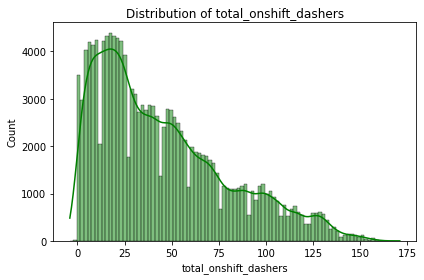

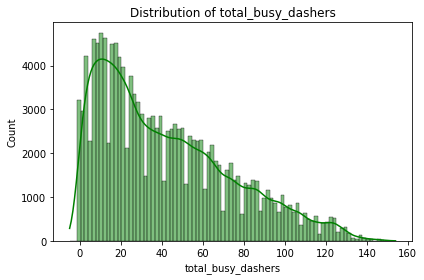

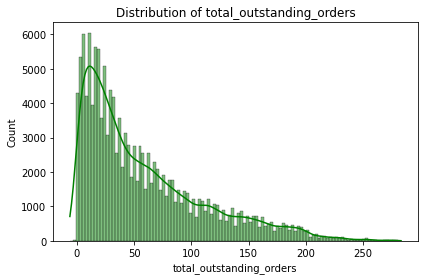

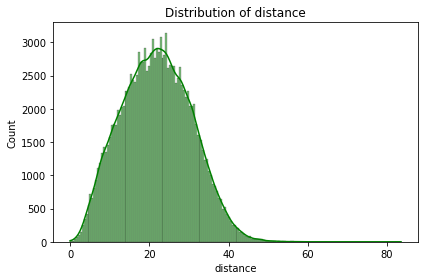

In [807]:
# Plot distributions for all numerical columns

for col in num_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_train[col], kde=True, color='green')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

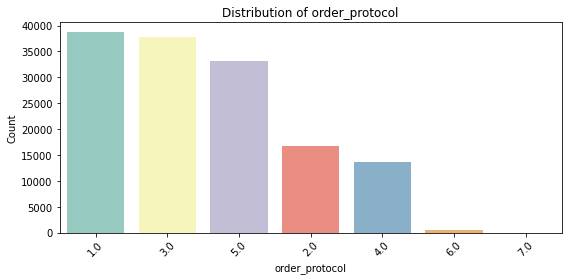

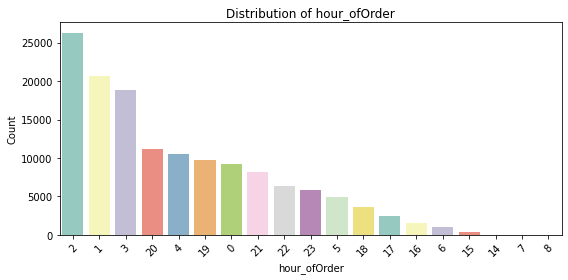

In [311]:
# Distribution of categorical columns

for col in cat_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index, palette='Set3')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

<Axes: xlabel='hour_ofOrder', ylabel='time_taken_minutes'>

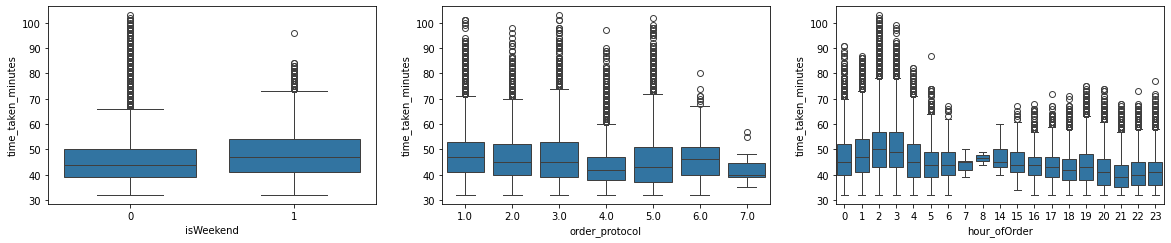

In [808]:
# Distribution of time_taken

plt.figure(figsize=(20,8))
plt.subplot(2,3,1)
sns.boxplot(x='isWeekend',y='time_taken_minutes',data =df_train )
plt.subplot(2,3,2)
sns.boxplot(x='order_protocol',y='time_taken_minutes',data =df_train )
plt.subplot(2,3,3)
sns.boxplot(x='hour_ofOrder',y='time_taken_minutes',data =df_train )

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

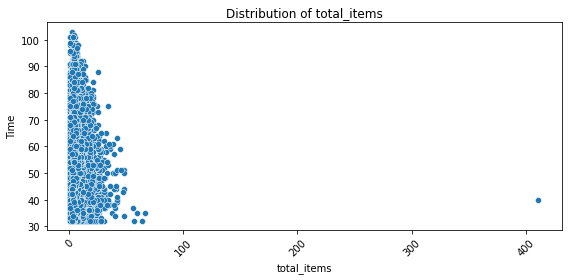

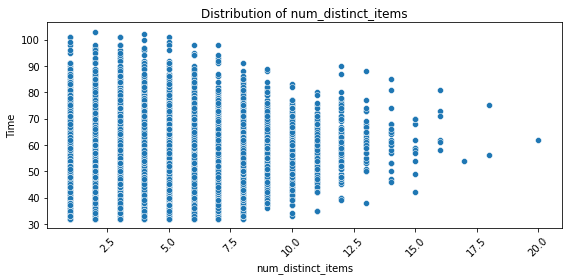

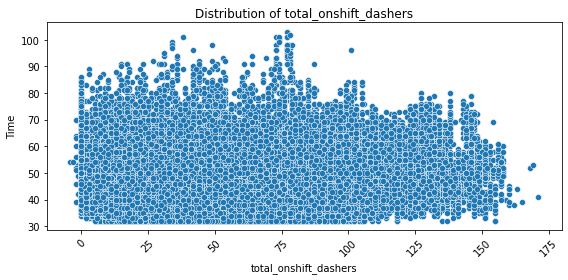

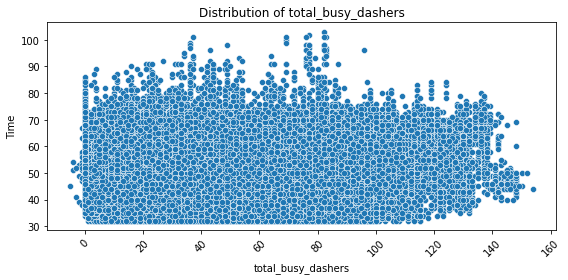

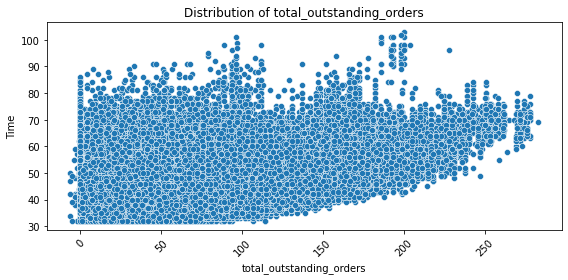

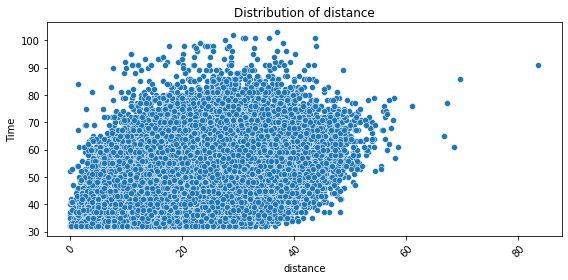

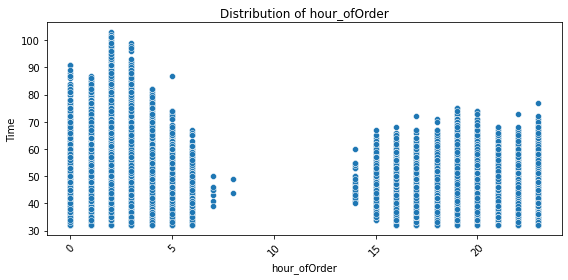

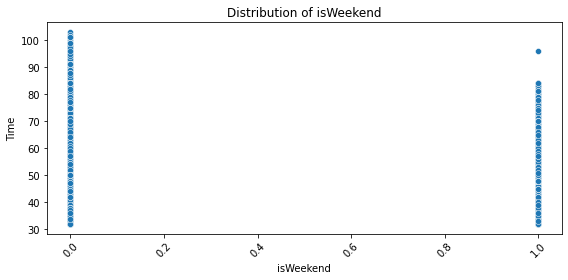

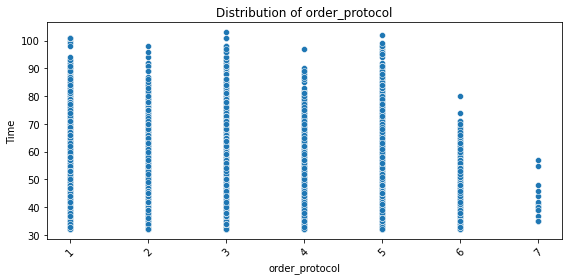

In [809]:
# Scatter plot to visualise the relationship between time_taken and other features

time = "time_taken_minutes"

feature_vars = ["total_items","num_distinct_items","total_onshift_dashers","total_busy_dashers","total_outstanding_orders","distance","hour_ofOrder","isWeekend", "order_protocol"]


for col in feature_vars:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df_train, x=col, y=time)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Time')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<Axes: xlabel='hour_ofOrder', ylabel='time_taken_minutes'>

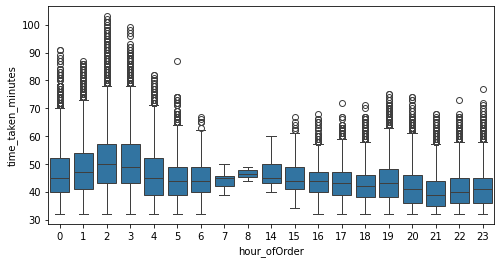

In [220]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(8, 4))
sns.boxplot(x='hour_ofOrder',y='time_taken_minutes',data =df_train )

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

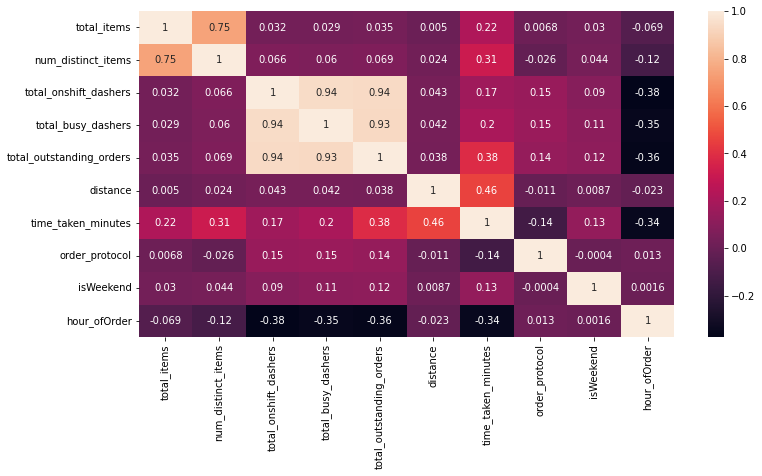

In [927]:
# Plot the heatmap of the correlation matrix

train_vars = ["total_items","num_distinct_items","total_onshift_dashers","total_busy_dashers","total_outstanding_orders","distance","time_taken_minutes","order_protocol","isWeekend","hour_ofOrder"]



plt.figure(figsize=(12,6))
sns.heatmap(df_train[train_vars].corr(),annot=True)
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [999]:
# Drop 3-5 weakly correlated columns from training dataset

#[Sheeshma] Considering ±0.1 to ±0.3 weekly correlated, removing isWeekend(0.13), order_protocol(-0.14)

df_train.drop(columns=["isWeekend","order_protocol"], inplace=True)



In [704]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 42111 to 38408
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   total_items               140621 non-null  int64  
 1   num_distinct_items        140621 non-null  int64  
 2   total_onshift_dashers     140621 non-null  float64
 3   total_busy_dashers        140621 non-null  float64
 4   total_outstanding_orders  140621 non-null  float64
 5   distance                  140621 non-null  float64
 6   time_taken_minutes        140621 non-null  float64
 7   hour_ofOrder              140621 non-null  int32  
 8   2.0                       140621 non-null  int32  
 9   3.0                       140621 non-null  int32  
 10  4.0                       140621 non-null  int32  
 11  5.0                       140621 non-null  int32  
 12  6.0                       140621 non-null  int32  
 13  7.0                       140621 non-null  int

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

<Axes: xlabel='distance', ylabel='time_taken_minutes'>

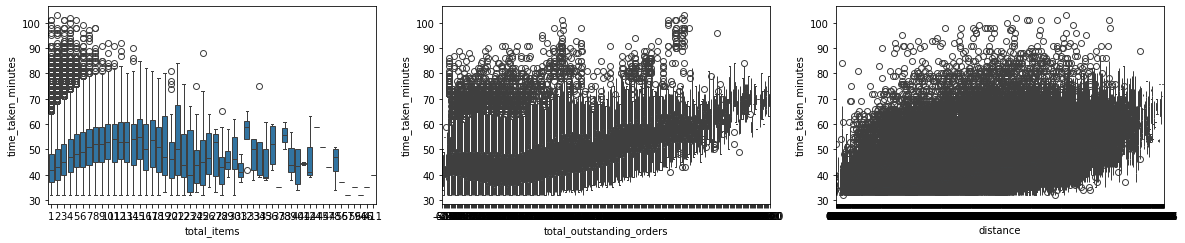

In [812]:
# Boxplot for time_taken

plt.figure(figsize=(20,8))
plt.subplot(2,3,1)
sns.boxplot(x='total_items',y='time_taken_minutes',data =df_train )
plt.subplot(2,3,2)
sns.boxplot(x='total_outstanding_orders',y='time_taken_minutes',data =df_train )
plt.subplot(2,3,3)
sns.boxplot(x='distance',y='time_taken_minutes',data =df_train )

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [1000]:
# Handle outliers

vars = ["total_items","num_distinct_items","total_outstanding_orders","total_onshift_dashers","distance","hour_ofOrder","total_busy_dashers","time_taken_minutes"]



In [706]:
df_train.isnull().mean()

total_items                 0.0
num_distinct_items          0.0
total_onshift_dashers       0.0
total_busy_dashers          0.0
total_outstanding_orders    0.0
distance                    0.0
time_taken_minutes          0.0
hour_ofOrder                0.0
2.0                         0.0
3.0                         0.0
4.0                         0.0
5.0                         0.0
6.0                         0.0
7.0                         0.0
dtype: float64

In [1001]:
df["total_outstanding_orders"].describe()

count    175777.000000
mean         58.230115
std          52.731043
min          -6.000000
25%          17.000000
50%          41.000000
75%          85.000000
max         285.000000
Name: total_outstanding_orders, dtype: float64

In [1002]:
Q1 = df_train["total_outstanding_orders"].quantile(0.25)
Q3 = df_train["total_outstanding_orders"].quantile(0.75)
IQR = Q3-Q1
uw = Q3+(1.5*IQR)
lw = Q1-(1.5*IQR)
print(uw)
print(lw)

187.0
-85.0


In [244]:
df_train.shape

(140621, 13)

In [816]:
df_train["total_outstanding_orders"].median()

41.0

In [817]:
df_train[df_train["total_outstanding_orders"] > 187]

total_items  num_distinct_items  total_onshift_dashers  \
58452             5                   5                  112.0   
22781             2                   2                  127.0   
30605             4                   4                  131.0   
161006            1                   1                  124.0   
60054             3                   3                  130.0   
...             ...                 ...                    ...   
173962            2                   2                  123.0   
173445            3                   3                  126.0   
108005            4                   3                  124.0   
163495            1                   1                  115.0   
6901              5                   5                  151.0   

        total_busy_dashers  total_outstanding_orders  distance  \
58452                100.0                     207.0     34.56   
22781                126.0                     217.0     16.24   
30605                123.0                     197.0     23.00   
161006               119.0                     256.0     15.88   
60054                125.0                     198.0     13.84   
...                    ...                       ...       ...   
173962               116.0                     234.0      6.40   
173445               122.0                     193.0     28.64   
108005               108.0                     196.0     32.64   
163495               108.0                     199.0      7.52   
6901                 120.0                     218.0     27.32   

        time_taken_minutes  hour_ofOrder  2.0  3.0  4.0  5.0  6.0  7.0  
58452                 71.0             2    0    0    0    1    0    0  
22781                 58.0             2    0    0    0    1    0    0  
30605                 54.0             2    0    0    0    1    0    0  
161006                68.0             3    0    0    0    1    0    0  
60054                 47.0             3    0    1    0    0    0    0  
...                    ...           ...  ...  ...  ...  ...  ...  ...  
173962                60.0             3    0    0    0    1    0    0  
173445                56.0             2    0    0    0    1    0    0  
108005                61.0             2    0    0    0    1    0    0  
163495                59.0             3    0    1    0    0    0    0  
6901                  57.0             2    1    0    0    0    0    0  

[4129 rows x 14 columns]

In [1003]:
df_train1 = df_train

In [523]:
df_train = df_train1

In [1004]:
#[Sheeshma] Remove outliers
df_train = df_train[(df_train['total_outstanding_orders'] >= lw) & (df_train['total_outstanding_orders'] <= uw)] 

In [710]:
df_train.shape

(136492, 14)

In [1005]:
QD1 = df_train["distance"].quantile(0.25)
QD3 = df_train["distance"].quantile(0.75)
IQRD = QD3-QD1
uwD = QD3+(1.5*IQRD)
lwD = QD1-(1.5*IQRD)
print(uwD)
print(lwD)

47.22
-3.8199999999999967


In [363]:
df_train[df_train["distance"] >= uwD]

order_protocol  total_outstanding_orders  distance  time_taken_minutes  \
60811             3.0                     119.0     47.60                48.0   
44524             5.0                       7.0     48.16                66.0   
142857            3.0                      63.0     48.84                51.0   
133430            3.0                      28.0     57.92                57.0   
7099              3.0                      37.0     49.52                50.0   
...               ...                       ...       ...                 ...   
23698             3.0                      13.0     51.16                53.0   
86481             3.0                      54.0     47.28                58.0   
73634             1.0                       4.0     50.44                58.0   
158659            3.0                      50.0     49.16                54.0   
37697             2.0                       0.0     51.64                75.0   

        hour_ofOrder  isWeekend  2.0  3.0  4.0  5.0  6.0  7.0  
60811              2          0    0    1    0    0    0    0  
44524              2          0    0    0    0    1    0    0  
142857            20          1    0    1    0    0    0    0  
133430            21          0    0    1    0    0    0    0  
7099               3          0    0    1    0    0    0    0  
...              ...        ...  ...  ...  ...  ...  ...  ...  
23698             20          0    0    1    0    0    0    0  
86481              3          0    0    1    0    0    0    0  
73634             19          0    0    0    0    0    0    0  
158659             0          1    0    1    0    0    0    0  
37697              0          0    1    0    0    0    0    0  

[262 rows x 12 columns]

In [1006]:
distance_median = df_train["distance"].median()


In [1007]:
#[Sheeshma] Replace outliers with median
df_train['distance'] = df_train['distance'].apply(lambda x: distance_median if x > uwD else x)

In [823]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136492 entries, 42111 to 38408
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   total_items               136492 non-null  int64  
 1   num_distinct_items        136492 non-null  int64  
 2   total_onshift_dashers     136492 non-null  float64
 3   total_busy_dashers        136492 non-null  float64
 4   total_outstanding_orders  136492 non-null  float64
 5   distance                  136492 non-null  float64
 6   time_taken_minutes        136492 non-null  float64
 7   hour_ofOrder              136492 non-null  int32  
 8   2.0                       136492 non-null  int32  
 9   3.0                       136492 non-null  int32  
 10  4.0                       136492 non-null  int32  
 11  5.0                       136492 non-null  int32  
 12  6.0                       136492 non-null  int32  
 13  7.0                       136492 non-null  int

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [714]:
# Define numerical and categorical columns for easy EDA and data manipulation

df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35156 entries, 139667 to 98870
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   order_protocol            35156 non-null  category
 1   total_items               35156 non-null  int64   
 2   num_distinct_items        35156 non-null  int64   
 3   total_onshift_dashers     35156 non-null  float64 
 4   total_busy_dashers        35156 non-null  float64 
 5   total_outstanding_orders  35156 non-null  float64 
 6   distance                  35156 non-null  float64 
 7   time_taken_minutes        35156 non-null  float64 
 8   hour_ofOrder              35156 non-null  int32   
 9   isWeekend                 35156 non-null  int64   
 10  2.0                       35156 non-null  int32   
 11  3.0                       35156 non-null  int32   
 12  4.0                       35156 non-null  int32   
 13  5.0                       35156 non-null  int3

In [1008]:
num_vars_test = ["total_items","num_distinct_items","total_onshift_dashers","total_busy_dashers","total_outstanding_orders","distance","time_taken_minutes"]
cat_vars_test = ["order_protocol","isWeekend","hour_ofOrder"]

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

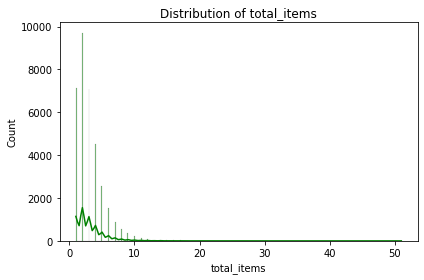

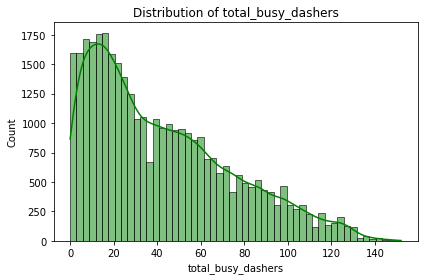

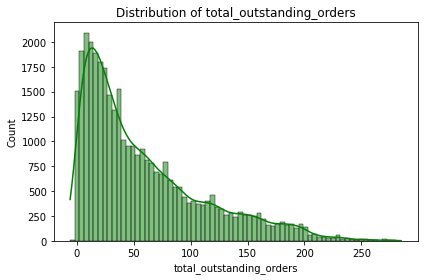

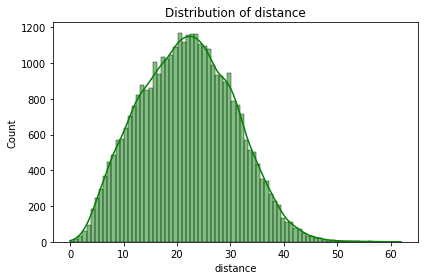

In [825]:
# Plot distributions for all numerical columns

for col in num_vars_test:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_test[col], kde=True, color='green')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

##### **4.1.2**
Check the distribution of categorical features

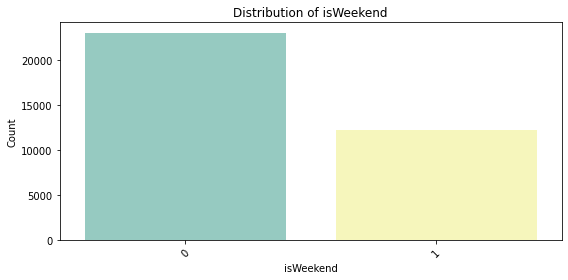

In [826]:
# Distribution of categorical columns

for col in cat_vars_test:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_test, x=col, order=df_test[col].value_counts().index, palette='Set3')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [827]:
# Distribution of time_taken

plt.figure(figsize=(20,8))
plt.subplot(2,3,1)
sns.boxplot(x='total_items',y='time_taken_minutes',data =df_test )
plt.subplot(2,3,2)
sns.boxplot(x='total_outstanding_orders',y='time_taken_minutes',data =df_test )
plt.subplot(2,3,3)
sns.boxplot(x='distance',y='time_taken_minutes',data =df_test )

<Axes: xlabel='distance', ylabel='time_taken_minutes'>

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

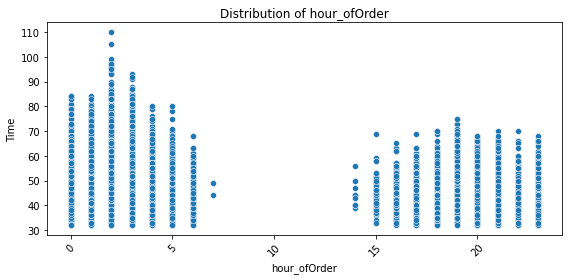

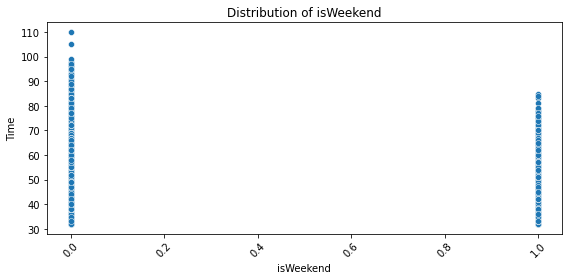

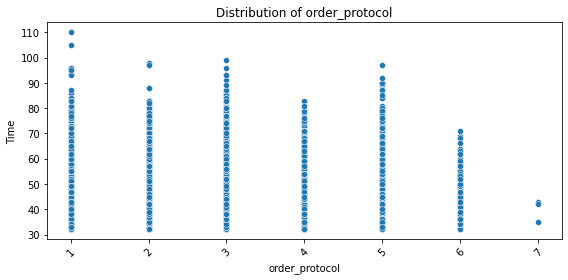

In [1009]:
# Scatter plot to visualise the relationship between time_taken and other features

time = "time_taken_minutes"

feature_vars = ["total_items","num_distinct_items","total_onshift_dashers","total_busy_dashers","total_outstanding_orders","distance","hour_ofOrder","isWeekend", "order_protocol"]


for col in feature_vars:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df_test, x=col, y=time)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Time')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [828]:
df_test.head()

order_protocol  total_items  num_distinct_items  total_onshift_dashers  \
139667            1.0            3                   2                   59.0   
80077             1.0            2                   1                   18.0   
41872             4.0            1                   1                   28.0   
165269            5.0            2                   2                  124.0   
151215            2.0            3                   2                   39.0   

        total_busy_dashers  total_outstanding_orders  distance  \
139667                59.0                      61.0     20.56   
80077                 17.0                      16.0     12.84   
41872                 27.0                      45.0     16.80   
165269               127.0                     200.0     19.00   
151215                30.0                      33.0     26.72   

        time_taken_minutes  hour_ofOrder  isWeekend  2.0  3.0  4.0  5.0  6.0  \
139667                39.0             3          0    0    0    0    0    0   
80077                 42.0             1          1    0    0    0    0    0   
41872                 48.0             3          0    0    0    1    0    0   
165269                55.0             3          1    0    0    0    1    0   
151215                37.0            22          1    1    0    0    0    0   

        7.0  
139667    0  
80077     0  
41872     0  
165269    0  
151215    0

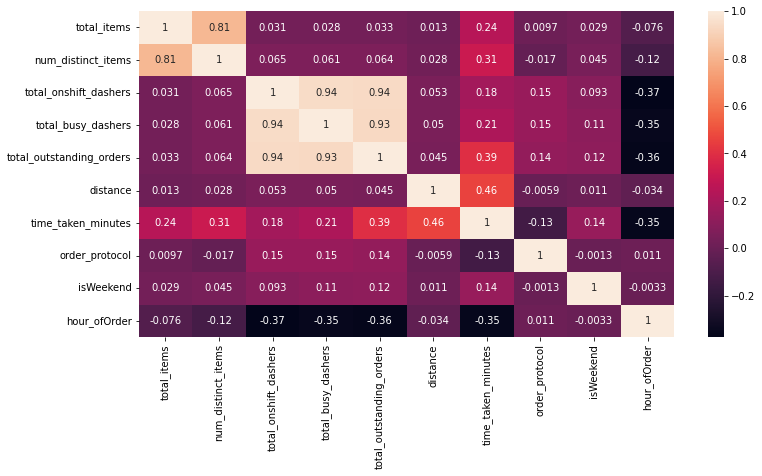

In [1010]:
# Drop the weakly correlated columns from training dataset

test_vars = ["total_items","num_distinct_items","total_onshift_dashers","total_busy_dashers","total_outstanding_orders","distance","time_taken_minutes","order_protocol","isWeekend","hour_ofOrder"]



#[Sheeshma] Identify the correlation

plt.figure(figsize=(12,6))
sns.heatmap(df_test[test_vars].corr(),annot=True)
plt.show()


In [936]:
df_test1 = df_test

In [831]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35156 entries, 139667 to 98870
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   order_protocol            35156 non-null  category
 1   total_items               35156 non-null  int64   
 2   num_distinct_items        35156 non-null  int64   
 3   total_onshift_dashers     35156 non-null  float64 
 4   total_busy_dashers        35156 non-null  float64 
 5   total_outstanding_orders  35156 non-null  float64 
 6   distance                  35156 non-null  float64 
 7   time_taken_minutes        35156 non-null  float64 
 8   hour_ofOrder              35156 non-null  int32   
 9   isWeekend                 35156 non-null  int64   
 10  2.0                       35156 non-null  int32   
 11  3.0                       35156 non-null  int32   
 12  4.0                       35156 non-null  int32   
 13  5.0                       35156 non-null  int3

In [878]:
df_test = df_test1

In [1011]:
#Considering ±0.1 to ±0.3 weekly correlated, removing "isWeekend"(0.14),"hour_ofOrder"(-0.14)

df_test.drop(columns=["isWeekend","order_protocol"], inplace=True)

In [833]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35156 entries, 139667 to 98870
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_items               35156 non-null  int64  
 1   num_distinct_items        35156 non-null  int64  
 2   total_onshift_dashers     35156 non-null  float64
 3   total_busy_dashers        35156 non-null  float64
 4   total_outstanding_orders  35156 non-null  float64
 5   distance                  35156 non-null  float64
 6   time_taken_minutes        35156 non-null  float64
 7   hour_ofOrder              35156 non-null  int32  
 8   2.0                       35156 non-null  int32  
 9   3.0                       35156 non-null  int32  
 10  4.0                       35156 non-null  int32  
 11  5.0                       35156 non-null  int32  
 12  6.0                       35156 non-null  int32  
 13  7.0                       35156 non-null  int32  
dtypes: flo

In [ ]:
#[Sheeshma] checking for outliers and impute the values in test set

In [1012]:
Q1 = df_test["total_outstanding_orders"].quantile(0.25)
Q3 = df_test["total_outstanding_orders"].quantile(0.75)
IQR = Q3-Q1
uw = Q3+(1.5*IQR)
lw = Q1-(1.5*IQR)
print(uw)
print(lw)

187.0
-85.0


In [842]:
df_test.shape

(35156, 14)

In [841]:
df_test[df_test['total_outstanding_orders'] >= uw]

total_items  num_distinct_items  total_onshift_dashers  \
165269            2                   2                  124.0   
61847             1                   1                  115.0   
138361            1                   1                  123.0   
20705             5                   4                   77.0   
172057            2                   2                  146.0   
...             ...                 ...                    ...   
60015             2                   2                  144.0   
165842            2                   2                  133.0   
2426              2                   2                  150.0   
170247            3                   3                  109.0   
64739             4                   4                  128.0   

        total_busy_dashers  total_outstanding_orders  distance  \
165269               127.0                     200.0     19.00   
61847                108.0                     199.0     25.72   
138361               118.0                     220.0     29.32   
20705                 83.0                     192.0     23.44   
172057               135.0                     231.0     20.28   
...                    ...                       ...       ...   
60015                108.0                     195.0     18.52   
165842               119.0                     247.0     16.28   
2426                 126.0                     229.0     12.64   
170247               105.0                     196.0     19.40   
64739                125.0                     257.0     30.76   

        time_taken_minutes  hour_ofOrder  2.0  3.0  4.0  5.0  6.0  7.0  
165269                55.0             3    0    0    0    1    0    0  
61847                 61.0             3    0    0    0    0    0    0  
138361                63.0             3    0    0    1    0    0    0  
20705                 94.0             2    0    0    0    0    0    0  
172057                57.0             3    0    1    0    0    0    0  
...                    ...           ...  ...  ...  ...  ...  ...  ...  
60015                 51.0             2    0    1    0    0    0    0  
165842                64.0             3    0    0    0    1    0    0  
2426                  52.0             3    0    0    0    0    0    0  
170247                62.0             2    0    0    0    1    0    0  
64739                 76.0             3    0    0    0    1    0    0  

[1092 rows x 14 columns]

In [1013]:
#[Sheeshma] Remove outliers
df_test = df_test[(df_test['total_outstanding_orders'] >= lw) & (df_test['total_outstanding_orders'] <= uw)]

In [1014]:
QD1 = df_test["distance"].quantile(0.25)
QD3 = df_test["distance"].quantile(0.75)
IQRD = QD3-QD1
uwD = QD3+(1.5*IQRD)
lwD = QD1-(1.5*IQRD)
print(uwD)
print(lwD)

47.41
-3.870000000000001


In [941]:
distance_median = df_test["distance"].median()


In [1015]:
#[Sheeshma] Replace outliers with median
df_test['distance'] = df_test['distance'].apply(lambda x: distance_median if x > uwD else x)

In [848]:
df_test.shape

(34091, 14)

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [1049]:
# Import libraries

import sklearn
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [720]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136492 entries, 42111 to 38408
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   total_items               136492 non-null  int64  
 1   num_distinct_items        136492 non-null  int64  
 2   total_onshift_dashers     136492 non-null  float64
 3   total_busy_dashers        136492 non-null  float64
 4   total_outstanding_orders  136492 non-null  float64
 5   distance                  136492 non-null  float64
 6   time_taken_minutes        136492 non-null  float64
 7   hour_ofOrder              136492 non-null  int32  
 8   2.0                       136492 non-null  int32  
 9   3.0                       136492 non-null  int32  
 10  4.0                       136492 non-null  int32  
 11  5.0                       136492 non-null  int32  
 12  6.0                       136492 non-null  int32  
 13  7.0                       136492 non-null  int

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [1017]:
# Apply scaling to the numerical columns

all_vars_final = ["num_distinct_items","total_outstanding_orders","distance","hour_ofOrder","time_taken_minutes"]


In [1018]:
scaler = MinMaxScaler()

df_train[all_vars_final] = scaler.fit_transform(df_train[all_vars_final])

In [1019]:
df_train.head(5)

total_items  num_distinct_items  total_onshift_dashers  \
42111             1            0.000000                   23.0   
20644             6            0.105263                   80.0   
79735             3            0.105263                  127.0   
167933            5            0.210526                   44.0   
80691             4            0.157895                    1.0   

        total_busy_dashers  total_outstanding_orders  distance  \
42111                 20.0                  0.129534  0.203390   
20644                 79.0                  0.626943  0.739831   
79735                106.0                  0.927461  0.545763   
167933                44.0                  0.347150  0.375424   
80691                  1.0                  0.031088  0.546610   

        time_taken_minutes  hour_ofOrder  2.0  3.0  4.0  5.0  6.0  7.0  
42111             0.000000      0.869565    1    0    0    0    0    0  
20644             0.434783      0.130435    1    0    0    0    0    0  
79735             0.318841      0.086957    1    0    0    0    0    0  
167933            0.347826      0.086957    0    0    0    1    0    0  
80691             0.173913      0.608696    0    0    1    0    0    0

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [724]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136492 entries, 42111 to 38408
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   total_items               136492 non-null  float64
 1   num_distinct_items        136492 non-null  float64
 2   total_onshift_dashers     136492 non-null  float64
 3   total_busy_dashers        136492 non-null  float64
 4   total_outstanding_orders  136492 non-null  float64
 5   distance                  136492 non-null  float64
 6   time_taken_minutes        136492 non-null  float64
 7   hour_ofOrder              136492 non-null  float64
 8   2.0                       136492 non-null  int32  
 9   3.0                       136492 non-null  int32  
 10  4.0                       136492 non-null  int32  
 11  5.0                       136492 non-null  int32  
 12  6.0                       136492 non-null  int32  
 13  7.0                       136492 non-null  int

In [1020]:
# Create/Initialise the model
y_train = df_train.pop("time_taken_minutes")
X_train = df_train 


In [1021]:
X_train_sm = sm.add_constant(X_train[["num_distinct_items","total_outstanding_orders","distance","hour_ofOrder"]])
 
lr = sm.OLS(y_train, X_train_sm)

In [1022]:
X_train_sm.head()

const  num_distinct_items  total_outstanding_orders  distance  \
42111     1.0            0.000000                  0.129534  0.203390   
20644     1.0            0.105263                  0.626943  0.739831   
79735     1.0            0.105263                  0.927461  0.545763   
167933    1.0            0.210526                  0.347150  0.375424   
80691     1.0            0.157895                  0.031088  0.546610   

        hour_ofOrder  
42111       0.869565  
20644       0.130435  
79735       0.086957  
167933      0.086957  
80691       0.608696

In [1023]:
# Train the model using the training data

lr_model = lr.fit()


In [1024]:
lr_model.params

const                       0.012708
num_distinct_items          0.417278
total_outstanding_orders    0.098594
distance                    0.321865
hour_ofOrder               -0.076945
dtype: float64

In [1025]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     time_taken_minutes   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                 2.556e+04
Date:                Sun, 04 May 2025   Prob (F-statistic):               0.00
Time:                        23:32:42   Log-Likelihood:             1.2234e+05
No. Observations:              136492   AIC:                        -2.447e+05
Df Residuals:                  136487   BIC:                        -2.446e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0127      0.001     13.566      0.000       0.011       0.015
num_distinct_items           0.4173      0.003    132.412      0.000       0.411       0.423
total_outstanding_orders     0.0986      0.001     82.450      0.000       0.096       0.101
distance                     0.3219      0.001    220.957      0.000       0.319       0.325
hour_ofOrder                -0.0769      0.001   -101.882      0.000      -0.078      -0.075
==============================================================================
Omnibus:                    11262.717   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20714.119
Skew:                           0.586   Prob(JB):                         0.00
Kurtosis:                       4.507   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1026]:
# Make predictions

y_train_pred = lr_model.predict(X_train_sm)

In [859]:
y_train_pred.head()

42111    -0.002810
20644     0.357014
79735     0.288523
167933    0.269971
80691     0.260452
dtype: float64

In [605]:
#[Sheeshma] Calculate the VIF

In [1029]:
X_train.drop(columns=["total_items","total_busy_dashers","total_onshift_dashers"], inplace=True)

In [1030]:
vif = pd.DataFrame()
vif['feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)

In [1031]:
vif

feature   VIF
2                  distance  4.19
1  total_outstanding_orders  2.79
0        num_distinct_items  1.92
3              hour_ofOrder  1.92
5                       3.0  1.91
7                       5.0  1.78
4                       2.0  1.40
6                       4.0  1.27
8                       6.0  1.01
9                       7.0  1.00

In [1032]:
# Find results for evaluation metrics

all_vars_final_test = ["num_distinct_items","total_outstanding_orders","distance","hour_ofOrder","time_taken_minutes"]

In [888]:
df_test.shape

(34091, 14)

In [1033]:
df_test[all_vars_final_test] = scaler.transform(df_test[all_vars_final_test])

In [738]:
df_test.head()

total_items  num_distinct_items  total_onshift_dashers  \
139667     0.004878            0.052632               0.360000   
80077      0.002439            0.000000               0.125714   
41872      0.000000            0.000000               0.182857   
165269     0.002439            0.052632               0.731429   
151215     0.004878            0.052632               0.245714   

        total_busy_dashers  total_outstanding_orders  distance  \
139667            0.402516                  0.347150  0.435593   
80077             0.138365                  0.113990  0.272034   
41872             0.201258                  0.264249  0.355932   
165269            0.830189                  1.067358  0.402542   
151215            0.220126                  0.202073  0.566102   

        time_taken_minutes  hour_ofOrder  2.0  3.0  4.0  5.0  6.0  7.0  
139667            0.101449      0.130435    0    0    0    0    0    0  
80077             0.144928      0.043478    0    0    0    0    0    0  
41872             0.231884      0.130435    0    0    1    0    0    0  
165269            0.333333      0.130435    0    0    0    1    0    0  
151215            0.072464      0.956522    1    0    0    0    0    0

In [1035]:
df_test.describe()

total_items  num_distinct_items  total_onshift_dashers  \
count  34091.000000        34091.000000           34091.000000   
mean       3.205215            0.088255              42.357103   
std        2.492760            0.085751              31.987648   
min        1.000000            0.000000              -2.000000   
25%        2.000000            0.000000              17.000000   
50%        3.000000            0.052632              35.000000   
75%        4.000000            0.105263              62.000000   
max       51.000000            0.947368             164.000000   

       total_busy_dashers  total_outstanding_orders      distance  \
count        34091.000000              34091.000000  34091.000000   
mean            39.576604                  0.308334      0.462504   
std             29.864307                  0.239937      0.183826   
min              0.000000                  0.000000      0.000000   
25%             15.000000                  0.119171      0.325424   
50%             33.000000                  0.233161      0.461864   
75%             60.000000                  0.445596      0.595763   
max            152.000000                  1.000000      1.003390   

       time_taken_minutes  hour_ofOrder           2.0           3.0  \
count        34091.000000  34091.000000  34091.000000  34091.000000   
mean             0.200216      0.376661      0.116600      0.266669   
std              0.130900      0.380106      0.320947      0.442224   
min              0.000000      0.000000      0.000000      0.000000   
25%              0.101449      0.086957      0.000000      0.000000   
50%              0.188406      0.130435      0.000000      0.000000   
75%              0.275362      0.826087      0.000000      1.000000   
max              0.971014      1.000000      1.000000      1.000000   

                4.0           5.0           6.0           7.0  
count  34091.000000  34091.000000  34091.000000  34091.000000  
mean       0.101640      0.231469      0.004224      0.000088  
std        0.302178      0.421777      0.064856      0.009381  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000  
75%        0.000000      0.000000      0.000000      0.000000  
max        1.000000      1.000000      1.000000      1.000000

In [1036]:
df_test1 = df_test

In [1037]:
y_test = df_test.pop("time_taken_minutes")
X_test = df_test1

In [1040]:
X_test_sm = sm.add_constant(X_test)

In [1043]:
X_test_sm.drop(columns=[2.0,3.0,4.0,5.0,6.0,7.0,"total_items","total_onshift_dashers","total_busy_dashers"], inplace=True, axis=1)

In [1044]:
y_test_pred = lr_model.predict(X_test_sm)

In [1045]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.4325745821500221

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [1050]:
# Loop through the number of features and test the model

estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=8) #8-20

In [1052]:
X=df1.drop(["time_taken_minutes"],axis=1)
y=df1["time_taken_minutes"]

In [1053]:
X_train_r,X_test_r,y_train_r,y_test_r=train_test_split(X,y,test_size=0.2,random_state=100)#80:20

In [1054]:
selector=selector.fit(X_train_r,y_train_r)
selector.support_

array([ True, False,  True,  True,  True,  True,  True,  True,  True])

In [1055]:
# Build the final model with selected number of features

selected_features=X_train_r.columns[selector.support_]
print(selected_features)

Index(['order_protocol', 'num_distinct_items', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders', 'distance',
       'hour_ofOrder', 'isWeekend'],
      dtype='object')


In [1056]:
X_train_sm=sm.add_constant(X_train_r) #X_train_sm["const"]=1
X_test_sm=sm.add_constant(X_test_r)

In [1057]:
model1=sm.OLS(np.array(y_train_r),X_train_sm) # Ordinary Least Squares
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                 7.602e+04
Date:                Sun, 04 May 2025   Prob (F-statistic):               0.00
Time:                        23:55:32   Log-Likelihood:            -3.8909e+05
No. Observations:              140621   AIC:                         7.782e+05
Df Residuals:                  140611   BIC:                         7.783e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       37.8374      0.043    882.479      0.000      37.753      37.921
order_protocol              -0.7525      0.007   -109.095      0.000      -0.766      -0.739
total_items                  0.0166      0.006      2.925      0.003       0.005       0.028
num_distinct_items           1.4032      0.010    146.702      0.000       1.384       1.422
total_onshift_dashers       -0.3621      0.001   -353.876      0.000      -0.364      -0.360
total_busy_dashers          -0.1381      0.001   -128.870      0.000      -0.140      -0.136
total_outstanding_orders     0.3476      0.001    565.431      0.000       0.346       0.349
distance                     0.4805      0.001    408.956      0.000       0.478       0.483
hour_ofOrder                -0.2815      0.001   -218.434      0.000      -0.284      -0.279
isWeekend                    1.3014      0.022     59.646      0.000       1.259       1.344
==============================================================================
Omnibus:                    36061.438   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           116717.438
Skew:                           1.302   Prob(JB):                         0.00
Kurtosis:                       6.624   Cond. No.                         466.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1058]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

Feature        VIF
0                     const  17.442006
1            order_protocol   1.033090
2               total_items   2.263416
3        num_distinct_items   2.290320
4     total_onshift_dashers  11.860712
5        total_busy_dashers  11.261879
6  total_outstanding_orders   9.944135
7                  distance   1.003133
8              hour_ofOrder   1.186478
9                 isWeekend   1.021413

In [1059]:
X_train_sm=X_train_sm.drop("total_onshift_dashers",axis=1)
X_test_sm=X_test_sm.drop("total_onshift_dashers",axis=1)

In [1060]:
model2=sm.OLS(np.array(y_train_r),X_train_sm)# Ordinary Least Squares
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                 3.696e+04
Date:                Sun, 04 May 2025   Prob (F-statistic):               0.00
Time:                        23:57:39   Log-Likelihood:            -4.3387e+05
No. Observations:              140621   AIC:                         8.678e+05
Df Residuals:                  140612   BIC:                         8.678e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       35.9700      0.059    614.808      0.000      35.855      36.085
order_protocol              -0.8183      0.009    -86.315      0.000      -0.837      -0.800
total_items                  0.0311      0.008      3.982      0.000       0.016       0.046
num_distinct_items           1.3734      0.013    104.431      0.000       1.348       1.399
total_busy_dashers          -0.3485      0.001   -284.127      0.000      -0.351      -0.346
total_outstanding_orders     0.2477      0.001    329.900      0.000       0.246       0.249
distance                     0.4746      0.002    293.819      0.000       0.471       0.478
hour_ofOrder                -0.2338      0.002   -132.642      0.000      -0.237      -0.230
isWeekend                    1.7610      0.030     58.802      0.000       1.702       1.820
==============================================================================
Omnibus:                    15269.380   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37986.579
Skew:                           0.637   Prob(JB):                         0.00
Kurtosis:                       5.204   Cond. No.                         400.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1062]:
X_train_sm=X_train_sm.drop("total_busy_dashers",axis=1)
X_test_sm=X_test_sm.drop("total_busy_dashers",axis=1)

In [1063]:
model3=sm.OLS(np.array(y_train_r),X_train_sm)# Ordinary Least Squares
res3=model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.950e+04
Date:                Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                        00:00:18   Log-Likelihood:            -4.6577e+05
No. Observations:              140621   AIC:                         9.316e+05
Df Residuals:                  140613   BIC:                         9.316e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       33.3483      0.072    460.072      0.000      33.206      33.490
order_protocol              -1.0096      0.012    -85.091      0.000      -1.033      -0.986
total_items                  0.0443      0.010      4.518      0.000       0.025       0.063
num_distinct_items           1.3878      0.016     84.109      0.000       1.355       1.420
total_outstanding_orders     0.0514      0.000    139.414      0.000       0.051       0.052
distance                     0.4649      0.002    229.447      0.000       0.461       0.469
hour_ofOrder                -0.2125      0.002    -96.175      0.000      -0.217      -0.208
isWeekend                    1.6984      0.038     45.201      0.000       1.625       1.772
==============================================================================
Omnibus:                    15324.783   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32159.498
Skew:                           0.691   Prob(JB):                         0.00
Kurtosis:                       4.892   Cond. No.                         332.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1064]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

Feature        VIF
0                     const  16.750537
1            order_protocol   1.027134
2               total_items   2.263219
3        num_distinct_items   2.290109
4  total_outstanding_orders   1.200124
5                  distance   1.002484
6              hour_ofOrder   1.171344
7                 isWeekend   1.017739

In [1065]:
y_train_pred=res3.predict(X_train_sm)
y_test_pred=res3.predict(X_test_sm)

In [1067]:
r2_train = r2_score(y_train_r, y_train_pred)
r2_test = r2_score(y_test_r, y_test_pred)
print("Train:",round(r2_train,2),"Test:",round(r2_test,2))

Train: 0.49 Test: 0.5


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [1068]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

residual = y_train_r -y_train_pred

<Axes: ylabel='Count'>

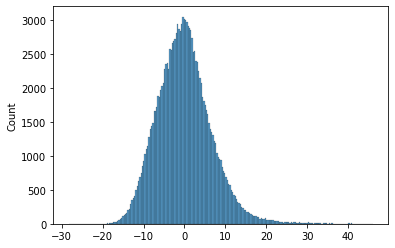

In [1069]:
sns.histplot(residual)

In [1048]:
print(X_train.shape, X_test.shape)
print(X_train.columns.equals(X_test.columns))

(136492, 10) (34091, 13)
False


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [1071]:
# Compare the scaled vs unscaled features used in the final model

#2_unscaled = 0.49, r2_scaled = 0.43

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [781]:
# Analyze the effect of a unit change in a feature, say 'total_items'

#[Sheeshma] = No change or effect if the total_items are removed as the correlation is less and VIF also less

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Yes, There are categorical variables in the dataset market_id, order_protocol, store_primary_category	

>However the effect or the dependency is only on the order_protocol, the market_id and store_primary_category does not effect the time taken asper analysis




---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>It means 20 percent set for test and 80 percent data for training the model



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>distance



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>Approach is to plot boxplot, find 25 percentile/75 percentile 1.5×IQR.
> Removed outliers for total_outstanding_orders
> Replaced outliers with median for distance



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>	distance	
>	total_outstanding_orders	
>	num_distinct_items	




---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
> It is the algorithm which a dependent variable is predicted using one more independent variables to fit a straight line.
> Formula for linear regression is y = beta0 + beta1*m+C
>Simple, fast, and interpretable, It works well when assumptions are met




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>The single linear regression relationship between one independent variable and one dependent variable. Formula is y=w0+w1+c
However for multipe regression more than one independent variable and one dependent variable
Formula is y=w0+w1x1+w2x2+c



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>It measures the difference between the predicted values of the model and the actual target values, mean square error,
>Gradient descent is used for minimizing




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

> Overfitting means when the model is heavily trained with data and made complex Too many features and Rsquare variable more than 95%
> Underfitting happens when the model is simple to capture the underlying patterns in the data. Less trained data



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
> Residual means actual minus predited data. The scatter plot on residual analysis is centered at zero and a curved graph, showing model has less error